In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from pprint import pprint
import pandas as pd


In [2]:
with open ("C:\\Users\himan\Downloads\CNN-Paper\Code_file\L06\code\datasets\iris.data") as f:
    data=f.read()


In [3]:
data=data.splitlines()
splitData=[]
for i in range(len(data)):
  splitData.append(data[i].split(','))

In [4]:

for i in range(len(splitData)):
  for j in range(len(splitData[i])):
    if splitData[i][j]=="Iris-setosa":                  #labeling the classes with numerical values for iris data set you have to change for different data set.
      splitData[i][len(splitData[i])-1]='1'
    if splitData[i][j]=="Iris-versicolor":
      splitData[i][len(splitData[i])-1]='2'
    if splitData[i][j]=="Iris-virginica":
      splitData[i][len(splitData[i])-1]='3'
splitData=splitData[:-1]

In [5]:
new_int_data=[]
for i in splitData:
  lst=[]
  for j in i:  #Making float values from string.
    lst.append(float(j))
  new_int_data.append(lst)
new_int_data= shuffle(new_int_data, random_state=0)



In [11]:
#now we split the data for training and testing
def trin_tst_sp(splitData,test_size):
  if isinstance(test_size,float):
    test_size=round(test_size*len(splitData))
  elif isinstance(test_size,int):
    test_size=test_size
                                          
  train_sample=[]
  test_sample=[]
  count=0
  for i in range(len(splitData)):
    count=count+1
    if count<=test_size:
        test_sample.append(splitData[i])
    elif count>test_size:
      train_sample.append(splitData[i])
  return(np.array(test_sample),np.array(train_sample))
test,train= trin_tst_sp(new_int_data,25)


In [12]:
test,train= trin_tst_sp(new_int_data,25)
dic1={1.0:"Iris-setosa",2.0:"Iris-versicolo",3.0:"Iris-virginica"}


In [13]:
def check_purity(data):
  lab_col=data[:,-1]
  uniq=np.unique(lab_col)# it check the purity of data which means that column has only one label or not
  if len(uniq)==1:
    return(True)
  else:
    return(False)
    

In [14]:
def Clsfy_da(data):
  lab_col=data[:,-1]
  uniq_cls,count_u_cls=np.unique(lab_col,return_counts=True)
  index=count_u_cls.argmax() # classify data 
  clsfy=dic1[uniq_cls[index]]
  return(clsfy)

In [15]:
def splitfun(data):
  split={}
  n_row,n_col=np.array(data).shape
  for col_ind in range(n_col-1):
    split[col_ind]=[]  #it splits a number based on the maximun value and minimun value of a particular column 
    val=data[:,col_ind]
    mx=max(val)
    mn=min(val)
    lp=np.linspace(mn,mx,50) 
    for ind in lp:
      split[col_ind].append(ind)    
  return(split)

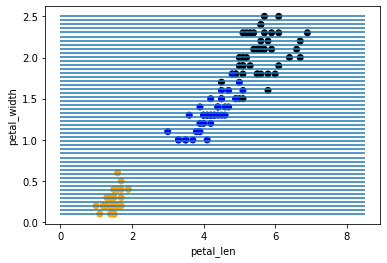

In [16]:

# color map for each category
colors = {1:'orange', 2:'blue',3:"black"}
color_ls = [colors[i] for i in train[:,4]]

# plot
#plt.scatter(train[:,0],train[:,3],c=color_ls)
plt.scatter(train[:,2],train[:,3],c=color_ls)   #plot of two columns of iris data set

plt.xlabel("petal_len")
plt.ylabel("petal_width")

plt.hlines(splitfun(train)[3],xmin=0,xmax=8.5)#plotting values of range of column petal width 
#plt.vlines(splitfun(train)[2],ymin=0,ymax=5)
plt.show()

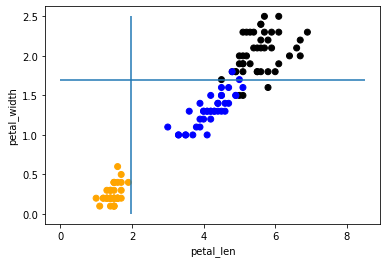

In [24]:

# color map for each category
colors = {1:'orange', 2:'blue',3:"black"}
color_ls = [colors[i] for i in train[:,4]]

# plot
#plt.scatter(train[:,0],train[:,3],c=color_ls)
plt.scatter(train[:,2],train[:,3],c=color_ls)   #plot of split values which repersent horizantal lines and data points of iris data set

plt.xlabel("petal_len")
plt.ylabel("petal_width")

plt.vlines([1.97],ymin=0,ymax=2.5)
plt.hlines([1.7],xmin=0,xmax=8.5)

#plt.vlines(splitfun(train)[2],ymin=0,ymax=5)
plt.show()

In [17]:
def split_data(data,split_col,split_val):
  split_colm_val=data[:,split_col]
  data_B=data[split_colm_val<=split_val] #spliting the values on the bases of beat value.

  data_A=data[split_colm_val>split_val]
  return(data_B,data_A)



In [18]:
#first we are going to calculate entropy of columns so we define the function of entropy 
def ent(col):
  lab_col=col[:,-1]
  _,count=np.unique(lab_col,return_counts=True)
  pro=count/count.sum()
  return(sum(-(pro*np.log2(pro))))

In [19]:
#To calculate entropy of columns. so we define the function of entropy 
def ent(col):
  lab_col=col[:,-1]
  _,count=np.unique(lab_col,return_counts=True)
  pro=count/count.sum()
  return(sum(-(pro*np.log2(pro))))

In [20]:
def infmation_gain(data,data_a,data_b):
  comp_ent=ent(data)
  data_1=len(data_a)
  data_2=len(data_b)                 #this is function of information gain
  data_t=sum([data_1,data_2])

  sub_div_ent=((data_1/data_t)*ent(data_a)+(data_2/data_t)*ent(data_b))
  gain=comp_ent-sub_div_ent
  return(gain)

In [21]:
def best_col_value(data,col_vis_split):
  en_entropy=0
  for col_ind in col_vis_split:
    for val in col_vis_split[col_ind]:
      data_B,data_A=split_data(data,split_col=col_ind,split_val=val)#it select the best col and value on the bases of information gain
      inform_gain=infmation_gain(data,data_A,data_B)
      if inform_gain>en_entropy:
        en_entropy=inform_gain
        best_col=col_ind
        best_val=val
  return(best_col,best_val)




In [22]:
dic2=["Sepal_Length","Sepal_Width","Petal_Length","Petal_Width"]
dic1={1.0:"Iris-setosa",2.0:"Iris-versicolo",3.0:"Iris-virginica"}


In [23]:
def dec_tree_algor(data,dic2,countt=0,depth=None): #MAIN Algo 
  if( (check_purity(data))or countt==depth ):
    classify=Clsfy_da(data)
    return(classify)
  #recursive part
  else:
    countt+=1
    col_vis_split=splitfun(data)
    split_col,split_val=best_col_value(data,col_vis_split)

    data_B,data_A=split_data(data,split_col,split_val)
    data_B=np.delete(data_B, split_col, 1)
    data_A=np.delete(data_A, split_col, 1)
    
    #sub-tree
    quest="{} <= {}".format(dic2[split_col],split_val)
    sub_tree={quest:[]}
    dic2.remove(dic2[split_col])
    yes_a=dec_tree_algor(data_B,dic2,countt,depth)
    no_a=dec_tree_algor(data_A,dic2,countt,depth)
    
    if yes_a==no_a:
      sub_tree=yes_a
    else:
      sub_tree[quest].append(yes_a)
      sub_tree[quest].append(no_a)
  return(sub_tree)

In [21]:
tree=dec_tree_algor(train,dic2,depth=3)
pprint(tree)

{'Petal_Length <= 1.963265306122449': ['Iris-setosa',
                                       {'Petal_Width <= 1.7040816326530612': [{'Sepal_Length <= 7.012244897959183': ['Iris-versicolo',
                                                                                                                     'Iris-virginica']},
                                                                              'Iris-virginica']}]}


In [22]:
dic3={"Sepal_Length":0,"Sepal_Width":1,"Petal_Length":2,"Petal_Width":3}
dic11={"Iris-setosa":1.0,"Iris-versicolo":2.0,"Iris-virginica":3.0}


In [23]:
# testing 
def classify_example(example, tree):
    question = list(tree.keys())[0]
    feature_name, comparison_operator, value = question.split()

    # ask question
    if example[dic3[feature_name]] <= float(value):
        answer = tree[question][0]
    else:
        answer = tree[question][1]

    # base case
    if not isinstance(answer, dict):
        return answer
    
    # recursive part
    else:
        residual_tree = answer
        return classify_example(example, residual_tree)

In [25]:
new=[]
for i in range(len(test)):
  x=classify_example(test[i],tree)
  new.append(dic11[x])


[3.0, 2.0, 1.0, 3.0, 1.0, 3.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 2.0, 2.0, 1.0, 1.0, 3.0, 2.0, 1.0, 1.0, 3.0]


In [26]:
#accuracyof function 
count=0
for i,j in zip(new,test[:,-1]):
  if i==j:
    count=count+1
print(f"the accuracy is {(count/len(test[:,-1]))*100}")

the accuracy is 96.0
